# Hello, Notebook!
Interested in learning how to use ArcGIS GeoAnalytics for Microsoft Fabric? Open this notebook to get started! Learn how to create and use Notebooks with the [ArcGIS GeoAnalytics library](https://developers.arcgis.com/geoanalytics-fabric/). Add and edit cells, import the ArcGIS GeoAnalytics library, and work with spatial data from [OneLake](https://learn.microsoft.com/en-us/fabric/onelake/onelake-overview) and from [ArcGIS Online](https://www.arcgis.com/index.html).


In this lesson, you will learn how to do the following:

* Create and save a notebook in the Data Science and Engineering workloads in Microsoft Fabric

* Work with a notebook

* Connect to a OneLake lakehouse

* Import the [ArcGIS GeoAnalytics for Microsoft Fabric](https://developers.arcgis.com/geoanalytics-fabric/) library

* Use ArcGIS GeoAnalytics to read spatial data  


For more information on working with your data in Microsoft Fabric, here are some useful references:
* [Create and use notebooks](https://learn.microsoft.com/en-us/fabric/data-engineering/how-to-use-notebook)
* [Develop and run notebooks](https://learn.microsoft.com/en-us/fabric/data-engineering/author-execute-notebook)
* [Explore data in lakehouse](https://learn.microsoft.com/en-us/fabric/data-engineering/lakehouse-notebook-explore)
* [Load data in lakehouse](https://learn.microsoft.com/en-us/fabric/data-engineering/lakehouse-notebook-load-data)

***Public Preview notes*** 
* ArcGIS GeoAnalytics is enabled in the Fabric Runtime 1.3 only

* In the ArcGIS GeoAnalytics _Public Preview_, to render base map tiles when plotting maps using the [st.plot](https://developers.arcgis.com/geoanalytics-fabric/tutorials/visualize/visualize-results-st-plot/) functionality, you will need to run the following configuration cell when starting your computing environment.  Note that using the configuration will lead to a slower startup for the computing environment.  This is not necessary if you do not require the base map tiles in your map.  Spatial data in your DataFrame will still render, however you will not have the base map tiles in the background. 

In [1]:
%%configure -f
{    
    "conf":    
    {   
        "spark.driver.extraJavaOptions" : "--add-opens java.base/jdk.internal.loader=ALL-UNNAMED",
        "spark.jars.packages": "com.google.protobuf:protobuf-java:3.25.5"    
    }
}

StatementMeta(, 86b4b202-572b-4b1b-8e73-c3b3a2217f40, -1, Finished, Available, Finished)

## Create or import a notebook in Microsoft Fabric
In Microsoft Fabric, when you see the option to create Notebooks in your workspace, you have access to create, import, and edit notebooks using Esri's ArcGIS GeoAnalytics for Microsoft Fabric library.  



There are several ways to create and import new notebooks. We will explore each of them in this tutorial.



### Create a notebook
If you want to create a new notebook in Fabric, you can add a notebook using the Workspace ```New item``` button.

You do not need to create a new notebook as part of this tutorial; we are simply documenting the process for future work to start new, blank notebooks.

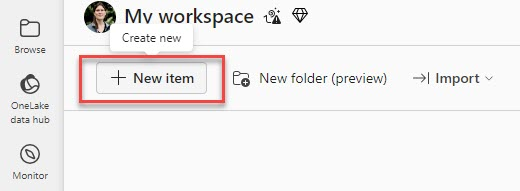

You can also use the ```Notebook``` tile on the Fabric Data Science or Data Engineering homepages. 

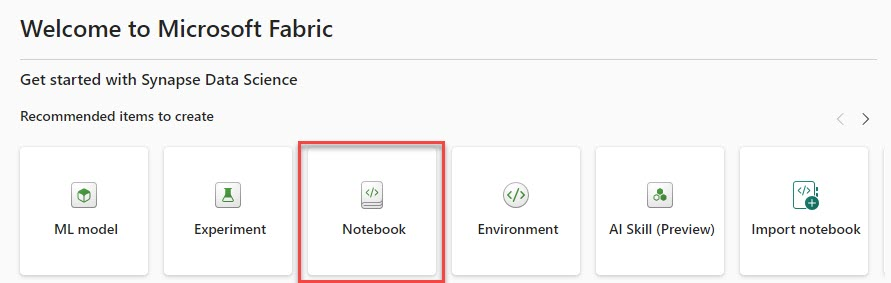
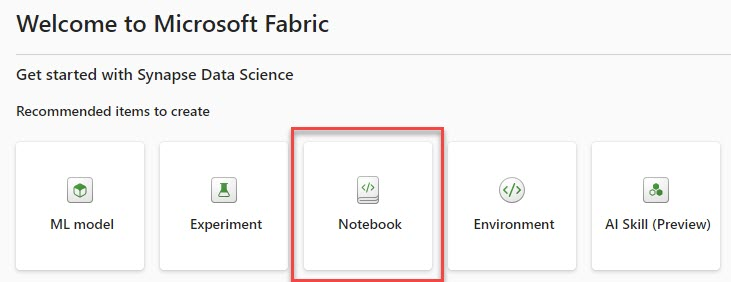

### Import a notebook

You can also import an existing notebook from your local computer from the workspace ```Import``` button or from the ```Import Notebook``` tile on the Data Science or Data Engineering homepages.

Fabric will recognize Jupyter Notebook .ipynb files, as well as other language-specific files (e.g., .py and .sql) and create the notebook item for you.

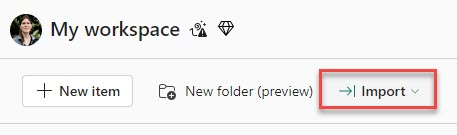

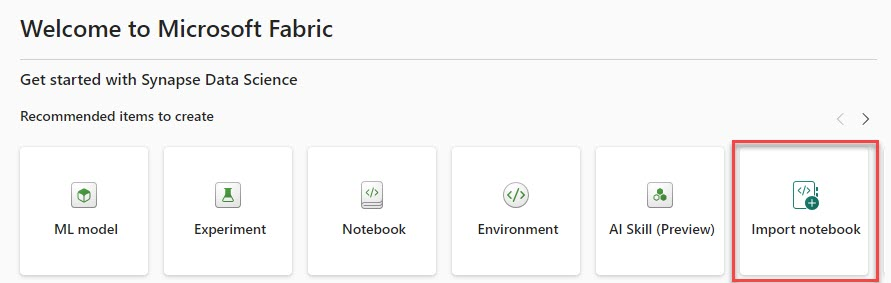

If you want to try importing a notebook, you can import and run this notebook into your Fabric account by:

1. Download the .ipynb from the learn.arcgis.com site
2. Import the notebook into your Fabric environment using the ```Import``` button in your workspace or the ```Import notebook``` tile on the Data Science or Data Engineering home pages
3. Start a compute resource to be able to run the cells in the notebook. ArcGIS GeoAnalytics is enabled in the default workspace runtime.

You can run a cell by clicking on the run arrow next to the cell (shown below), or through keyboard shortcuts as described in the [Develop, execute, and manage Microsoft Fabric notebooks](https://learn.microsoft.com/en-us/fabric/data-engineering/author-execute-notebook#run-notebooks) documentation.

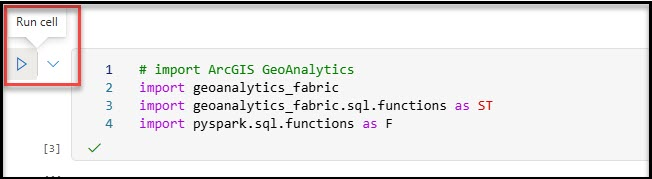

# Work with a notebook
Each new notebook starts with a code cell with a starter comment.  You can start in this cell and add code and markdown cells to create your workflow.  

When you move your cursor underneath a cell, you will see buttons appear to add new Code or Markdown cells.  

New cells can also be added with keyboard shortcuts.  More information can be found in the Fabric help documents on [Develop, execute, and manage Microsoft Fabric notebooks](https://learn.microsoft.com/en-us/fabric/data-engineering/author-execute-notebook)








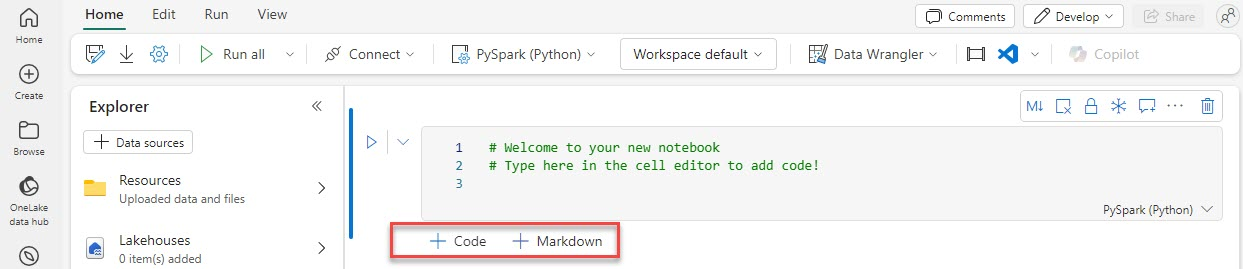

## Save your notebook
By default, AutoSave is turned on in the notebook.  If you would like to turn that off, you can edit the setting on the Edit tab in the menu.

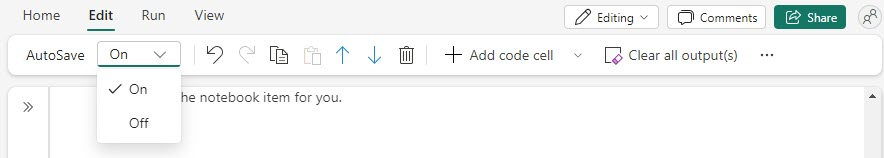

If you turn AutoSave off, you can save your notebook using the ```Save``` button or with **CTRL+s** 

You can also save a copy with a new name using the ```Save As``` menu option.

## Name, or re-name, your notebook

You can rename a notebook by clicking on the notebook name in the top section of the interface and typing the new name in the Name text box 

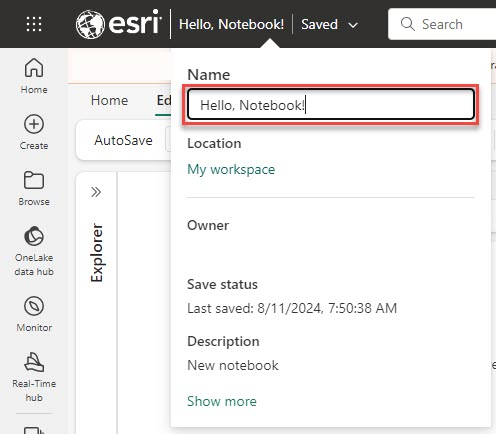

# Connect to a Lakehouse

The Fabric Lakehouse is a location where you can store and manage your data.  To work with data within your Fabric environment, you will need to connect to a Lakehouse that houses the data.  

Your Lakehouse must be connected before you start your computing session.

To connect to a Lakehouse, click on ```Lakehouses``` in the Explorer pane and ```Add Lakehouse```.  

For more information, refer to ["What is a lakehouse in Microsoft Fabric?"](https://learn.microsoft.com/en-us/fabric/data-engineering/lakehouse-overview)

Note that this notebook does not require access to a Lakehouse, so you do not need to create or add one.

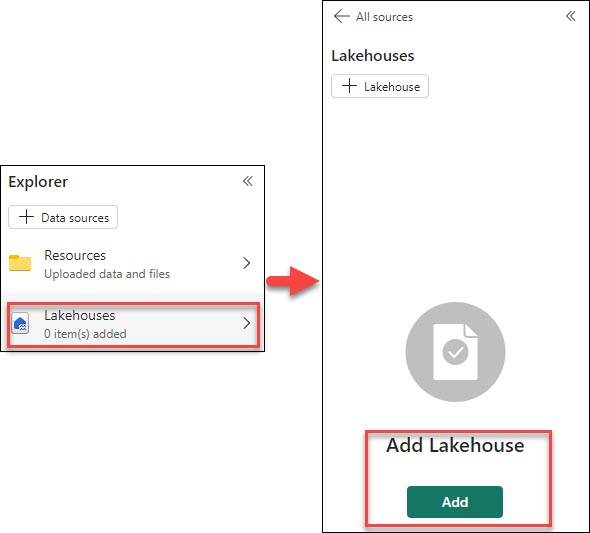

# Start your computing session

By default, a Fabric computing session is not running.  You can attach and start a session by running the first cell in your notebook, or by connecting to a new session.  

To run a cell in your notebook you can hover on the cell and select the ```Run cell``` button or press **CTRL+Enter**

If you have set up custom environments, select your workspace environment using the drop-down before you start your session.  For more information on custom environments in Fabric, see [Create, configure, and use an environment in Microsoft Fabric](https://learn.microsoft.com/en-us/fabric/data-engineering/create-and-use-environment)

ArcGIS GeoAnalytics is available by default in Runtime 1.3 and up.

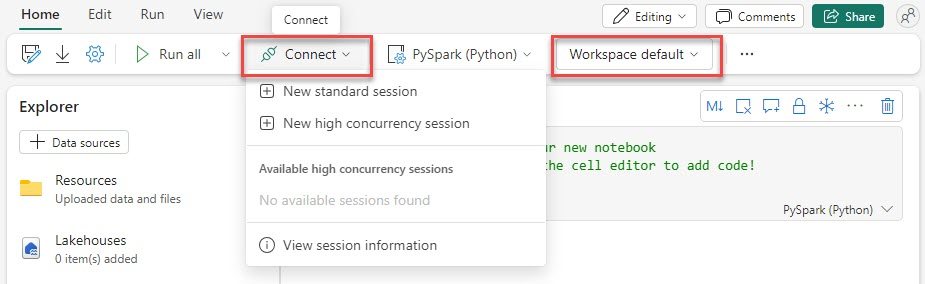

# Import the ArcGIS GeoAnalytics for Microsoft Fabric library

To work with ArcGIS GeoAnalytics for Microsoft Fabric, you need to import it in your notebook.  The library is named ```geoanalytics_fabric```

This imports the library at the top level.  To make the functionality easier to access, we recommend also importing the [geospatial functions](https://developers.arcgis.com/geoanalytics-fabric/sql-functions/) directly, and to give them an easy to use alias for reference.  In the example below, we import the library and the functions with an alias of ```ST```.  Since each of the functions are named ST.\<function_name\> this makes them easy to reference and identifies them as being Spatial Type (ST) functions.  This will also align with the structure of examples throughout the ArcGIS GeoAnalytics documentation.


For instance, after importing, you would be able to reference the ST_Buffer function using ```ST.buffer```

See the [developer documentation](https://developers.arcgis.com/geoanalytics-fabric/) for more information about the functions available in ArcGIS GeoAnalytics.


In [3]:
# import the library
import geoanalytics_fabric
# import the geospatial functions
import geoanalytics_fabric.sql.functions as ST

StatementMeta(, 86b4b202-572b-4b1b-8e73-c3b3a2217f40, 4, Finished, Available, Finished)

# Use ArcGIS GeoAnalytics to read spatial data



The ArcGIS GeoAnalytics library facilitates working with spatial data from many different data sources, such as: 

* [CSV](https://developers.arcgis.com/geoanalytics-fabric/data/data-sources/csv/)
* [Esri Feature service](https://developers.arcgis.com/geoanalytics-fabric/data/data-sources/feature-service/)
* [File geodatabase](https://developers.arcgis.com/geoanalytics-fabric/data/data-sources/filegdb/)
* [GeoJSON](https://developers.arcgis.com/geoanalytics-fabric/data/data-sources/geojson/)
* [GeoParquet](https://developers.arcgis.com/geoanalytics-fabric/data/data-sources/geoparquet/)
* [Parquet](https://developers.arcgis.com/geoanalytics-fabric/data/data-sources/parquet/)
* [Shapefile](https://developers.arcgis.com/geoanalytics-fabric/data/data-sources/shapefile/)

If the data already have coordinates for points, lines, and/or polygons, the data may automatically be recognized and ingested as a geometry type column.  If not, there are numerous functions for converting formats such as well-known text, well-known binary, GeoJSON, or x/y coordinates into point, line, and polygon geometry.  

Details on the data sources supported and the spatial functions in ArcGIS GeoAnalytics for creating geometry can be found here:
* [Data sources](https://developers.arcgis.com/geoanalytics-fabric/data/data-sources/)
* [SQL functions](https://developers.arcgis.com/geoanalytics-fabric/sql-functions/)
* [Track functions](https://developers.arcgis.com/geoanalytics-fabric/trk-functions/)




## Read a feature service from the Esri Living Atlas of the World
Let's read in some spatial data and look at how it appears using the ArcGIS GeoAnalytics library.  

In this case, we will read in a feature service containing [states of the United States](https://www.arcgis.com/home/item.html?id=8c2d6d7df8fa4142b0a1211c8dd66903) from the [Esri ArcGIS Living Atlas of the World](https://livingatlas.arcgis.com/en/home/)

In [4]:
# create a DataFrame with the US County data
df = spark\
    .read\
    .format("feature-service")\
    .load("https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_States_Generalized_Boundaries/FeatureServer/0")

StatementMeta(, 86b4b202-572b-4b1b-8e73-c3b3a2217f40, 5, Finished, Available, Finished)

## Explore the structure of the data
After reading the data from the Esri ArcGIS Living Atlas of the World, we can look at the list of fields available, and their data type, using the PySpark [printSchema()](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.printSchema.html) command in Spark.

Since this dataset is coming from a _spatial_ data source, it already has a geometry field - ```shape``` that is listed as a ```polygon``` type.



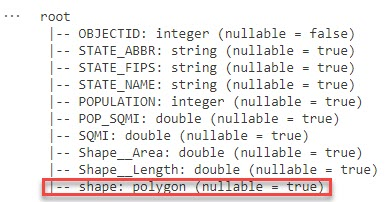
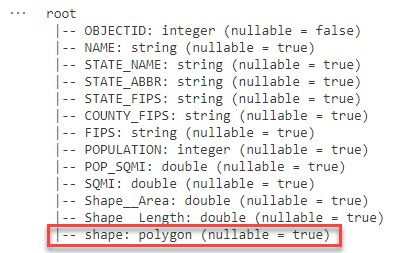

In [5]:
# view the data schema
df.printSchema()

StatementMeta(, 86b4b202-572b-4b1b-8e73-c3b3a2217f40, 6, Finished, Available, Finished)

root
 |-- OBJECTID: integer (nullable = false)
 |-- STATE_ABBR: string (nullable = true)
 |-- STATE_FIPS: string (nullable = true)
 |-- STATE_NAME: string (nullable = true)
 |-- POPULATION: integer (nullable = true)
 |-- POP_SQMI: double (nullable = true)
 |-- SQMI: double (nullable = true)
 |-- Shape__Area: double (nullable = true)
 |-- Shape__Length: double (nullable = true)
 |-- shape: polygon (nullable = true)




We can also view the data as a table with [display()](https://learn.microsoft.com/en-us/fabric/data-engineering/notebook-visualization#built-in-visualization-command----display-function), Fabric's built in visualization function .  Since this is just a _table_ we don't see the geometry points, lines, or polygons as a map in the table, we just see a slightly more human readable list of the coordinates that make up the point, line, or polygon in the geometry field in the table.

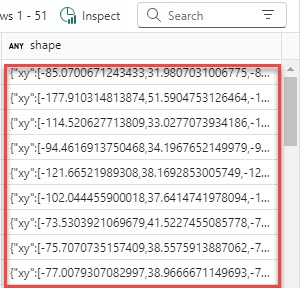
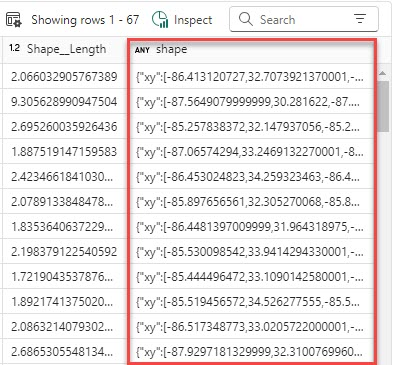

In [6]:
# view the table
display(df)

StatementMeta(, 86b4b202-572b-4b1b-8e73-c3b3a2217f40, 7, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 2c6820a3-1a76-4ad6-a418-0779ce16a9a5)

## Make a map of the data
We can also make quick, static maps to look at the geometry in map form using the [st.plot](https://developers.arcgis.com/geoanalytics-fabric/api-reference/geoanalytics_fabric.extensions.html#plot) functionality in ArcGIS GeoAnalytics.


There are four basemaps provided: 
* light (Light Gray Canvas)
* dark (Dark Gray Canvas)
* streets (Esri Streets Basemap)
* osm (OpenStreetMap Vector Basemap)

StatementMeta(, 86b4b202-572b-4b1b-8e73-c3b3a2217f40, 8, Finished, Available, Finished)

<Axes: >

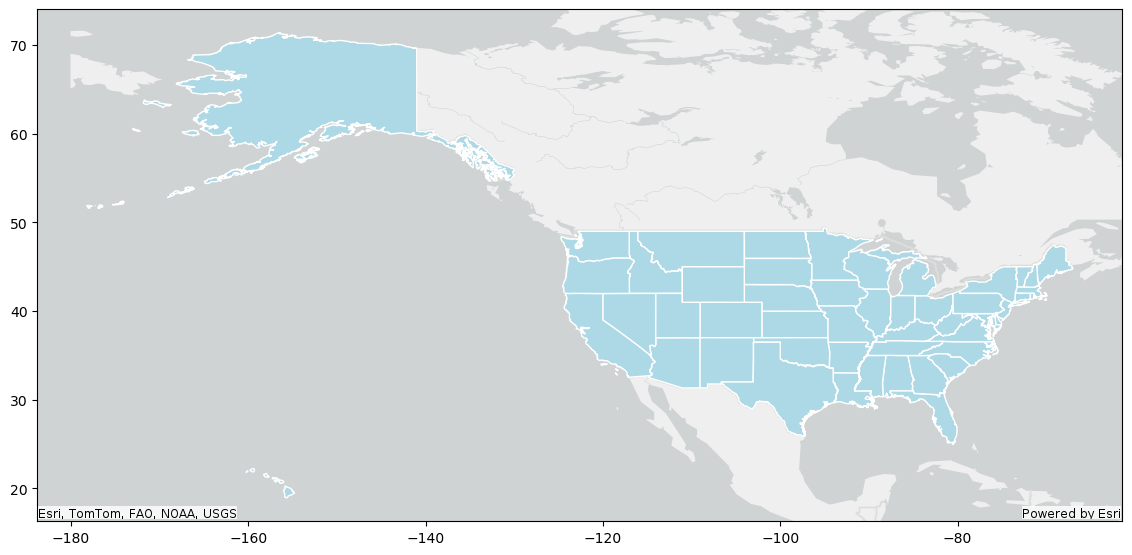

In [7]:
# plot a static map
# If you only have one geometry field in your DataFrame, 
# you do not need to specify the geometry. However, it is included below as an example.
df.st.plot(
    basemap="light", 
    facecolor="lightblue",
    edgecolor="white",
    figsize=(14, 14),
    geometry="shape")

## Use a spatial function with the data
We can also use the spatial functions in ArcGIS GeoAnalytics to explore and analyze the data.  In this tutorial, we will use a simple example with [ST_Centroid](https://developers.arcgis.com/geoanalytics-fabric/sql-functions/st_centroid/) calculation to find the centroid within each polygon.

In [8]:
# calculate the centroid using ST_Centroid
# we will add this as a new column in our DataFrame
# to do this, we use ST.centroid and reference the polygon geometry field ("shape") for which we want to calculate the centroid
df = df.withColumn("centroid", ST.centroid("shape"))


StatementMeta(, 86b4b202-572b-4b1b-8e73-c3b3a2217f40, 9, Finished, Available, Finished)

In [9]:
# explore the table to see the new geometry
display(df)

StatementMeta(, 86b4b202-572b-4b1b-8e73-c3b3a2217f40, 10, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 1cd5d60f-d00a-47f0-9f3c-2bba21df014f)

We can now plot this new geometry to see what was calculated.

Because we now have _two_ geometry fields in our DataFrame, we have to specify which one to plot using ```geometry=``` 

StatementMeta(, 86b4b202-572b-4b1b-8e73-c3b3a2217f40, 11, Finished, Available, Finished)

<Axes: >

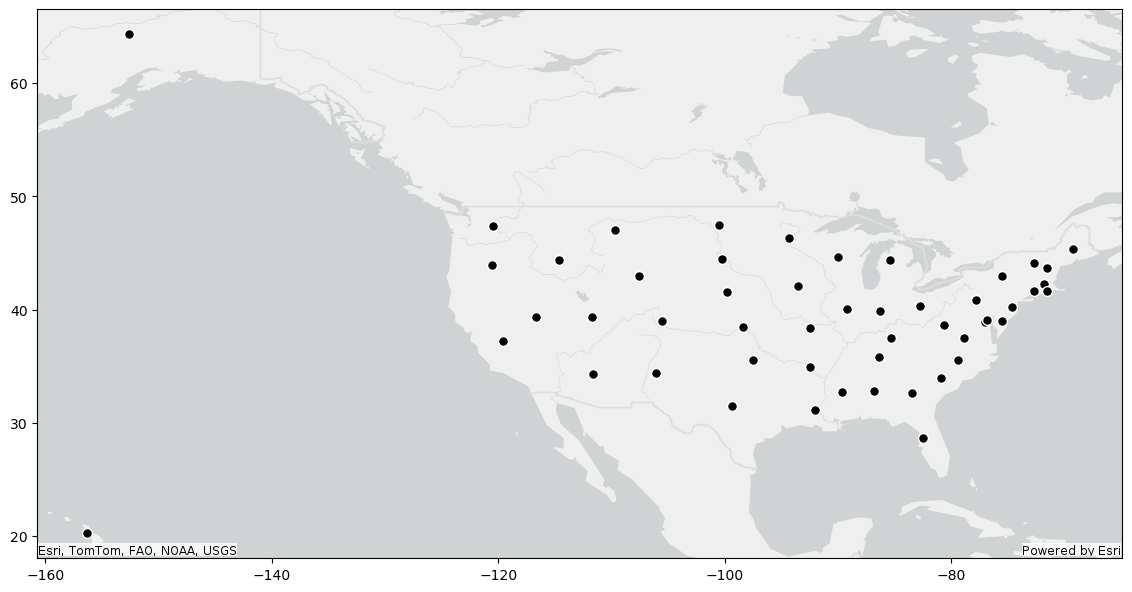

In [10]:
df.st.plot(
    basemap="light", 
    marker_size=50,
    edgecolor="white",
    color="black",
    figsize=(14, 14),
    geometry="centroid")

Or we could plot our state polygons and centroid points together with two uses of the st.plot function 

StatementMeta(, 86b4b202-572b-4b1b-8e73-c3b3a2217f40, 12, Finished, Available, Finished)

<Axes: >

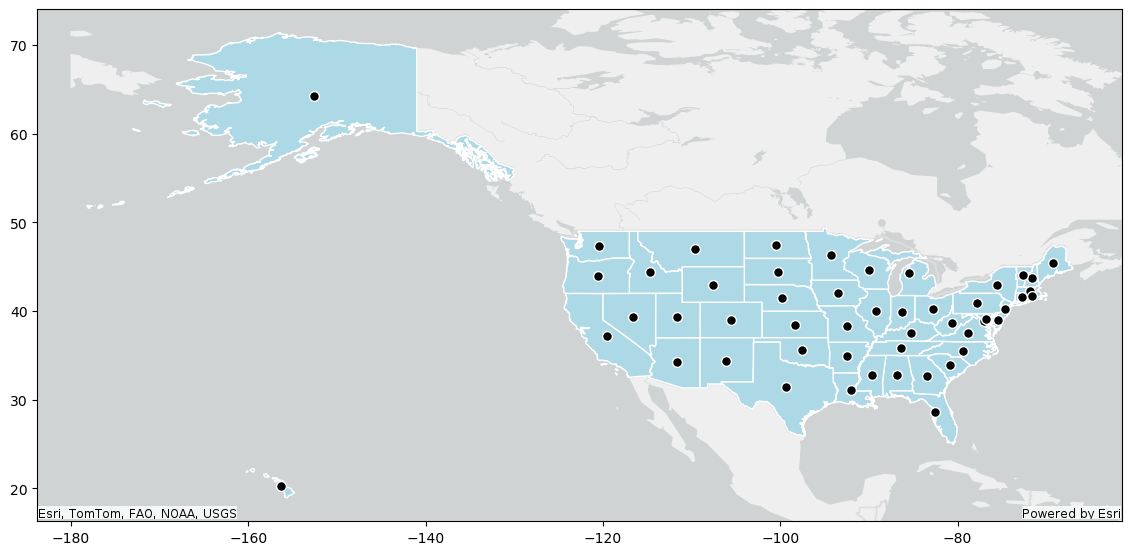

In [11]:
# create the first layer
myplt = df.st.plot(
    basemap="light", 
    facecolor="lightblue",
    edgecolor="white",
    figsize=(14, 14),
    geometry="shape")

# reference the structure of the first layer (saved as myplt) and render the points
df.st.plot(
    ax=myplt,
    marker_size=50,
    edgecolor="white",
    color="black",
    geometry="centroid" )

# Summary
In this tutorial, you have created a notebook in Microsoft Fabric and imported the ArcGIS GeoAnalytics for Microsoft Fabric library.  Using ArcGIS GeoAnalytics, you opened a spatial data source from the Esri Living Atlas of the World, explored the structure of the data, and made a map.

# More resources

There are numerous resources available on the learn.microsoft.com site for starting up working with notebooks.  We recommend starting with the Notebook section in the [Data Enginering documentation](https://learn.microsoft.com/en-us/fabric/data-engineering/).  

Additional useful references include:
* [Create and use notebooks](https://learn.microsoft.com/en-us/fabric/data-engineering/how-to-use-notebook)
* [Develop and run notebooks](https://learn.microsoft.com/en-us/fabric/data-engineering/author-execute-notebook)
* [Explore data in lakehouse](https://learn.microsoft.com/en-us/fabric/data-engineering/lakehouse-notebook-explore)
* [Load data in lakehouse](https://learn.microsoft.com/en-us/fabric/data-engineering/lakehouse-notebook-load-data)

There are also numerous resources available for ArcGIS GeoAnalytics for Microsoft Fabric in the [developer documentation](https://developers.arcgis.com/geoanalytics-fabric/) to document the functions and tools available to work with your geospatial data.
